In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.compose import EnsembleForecaster

#Online Expert Files
from sktime.forecasting.ensemble_algorithms import *
from sktime.forecasting.online_experts import *
from sktime.forecasting.online_ensemble import OnlineEnsembleForecaster

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

%matplotlib inline

## Airline Dataset Problem Setup

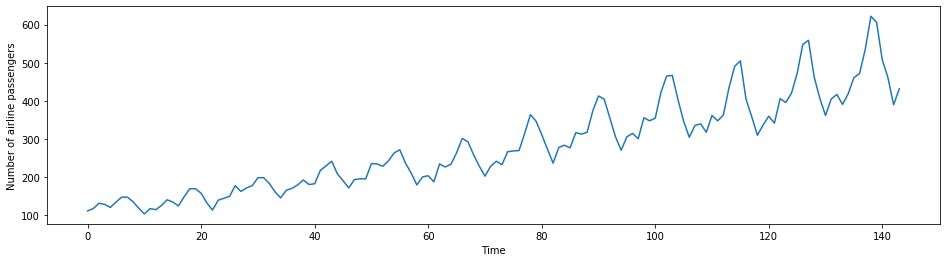

In [3]:
y = load_airline()
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of airline passengers");

In [4]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
print(y_train.shape[0], y_test.shape[0])

108 36


In [5]:
fh = np.arange(len(y_test)) + 1
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

## Setting up Forecasters

0.051022874662894326

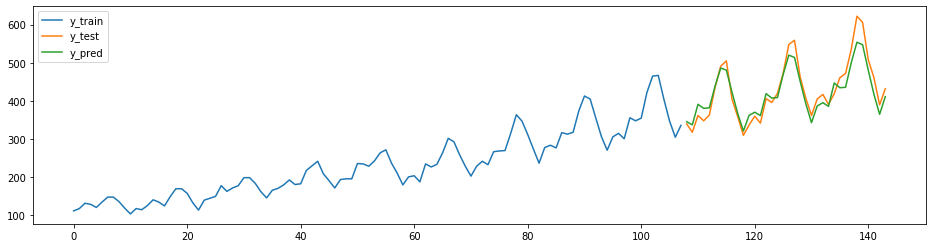

In [6]:
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [7]:
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])

forecaster.fit(y_train,fh=np.arange(1)+1)

/home/memo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


EnsembleForecaster(forecasters=[('ses',
                                 ExponentialSmoothing(damped=False,
                                                      damping_slope=None,
                                                      optimized=True,
                                                      remove_bias=False,
                                                      seasonal='multiplicative',
                                                      smoothing_level=None,
                                                      smoothing_seasonal=None,
                                                      smoothing_slope=None,
                                                      sp=12, trend=None,
                                                      use_basinhopping=False,
                                                      use_boxcox=False)),
                                ('holt',
                                 ExponentialSmoothing(damped=False,
                             

In [8]:
fh = np.arange(len(y_test)) + 1
predict = forecaster._predict(fh)

[]

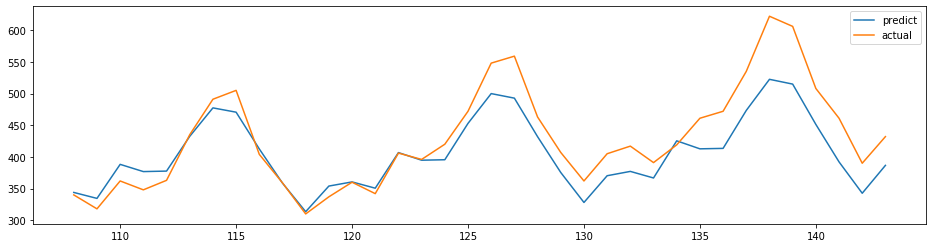

In [9]:
plot_ys(predict,y_test,labels=['predict','actual'])
plt.plot()

In [10]:
np.sum(se(predict.to_numpy(),y_test.to_numpy()))

58100.189521643995

In [11]:
loss_func = lambda x,y: se(x/600,y/600)

In [12]:
# hedge_expert = HedgeExpertEnsemble(3,80,OnlineHedgeDoubling,loss_func=loss_func)
hedge_expert = HedgeExpertEnsemble(3,80,NormalHedge,loss_func=loss_func)

In [13]:
forecaster = OnlineEnsembleForecaster(hedge_expert,[
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])

In [14]:
forecaster.fit(y_train)

/home/memo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


OnlineEnsembleForecaster(ensemble_algorithm=<sktime.forecasting.ensemble_algorithms.HedgeExpertEnsemble object at 0x7f55c611c610>,
                         forecasters=[('ses',
                                       ExponentialSmoothing(damped=False,
                                                            damping_slope=None,
                                                            optimized=True,
                                                            remove_bias=False,
                                                            seasonal='multiplicative',
                                                            smoothing_level=None,
                                                            smoothing_seasonal=None,
                                                            smoothing_slope=None,
                                                            sp=12, trend=None,
                                                            use_basi...
                           

In [15]:
forecaster._fit_ensemble(y_test)

In [16]:
fh = np.arange(len(y_test)) + 1
forecaster._predict(fh)

108    345.598030
109    337.456590
110    391.274288
111    380.633441
112    382.068906
113    438.512595
114    486.140313
115    480.825037
116    422.402186
117    367.227931
118    321.240642
119    362.203432
120    370.502995
121    361.629689
122    419.136202
123    407.577752
124    408.956222
125    469.192103
126    519.954837
127    514.077102
128    451.446562
129    392.334663
130    343.078883
131    386.687657
132    395.407961
133    385.802788
134    446.998116
135    434.522063
136    435.843539
137    499.871612
138    553.769361
139    547.329168
140    480.490937
141    417.441395
142    364.917124
143    411.171883
dtype: float64

In [18]:
forecaster.ensemble_algorithm.weights

array([0.        , 0.55410153, 0.44589847])

In [19]:
fh = np.arange(len(y_test)) + 1
predict = forecaster._predict(fh)

[]

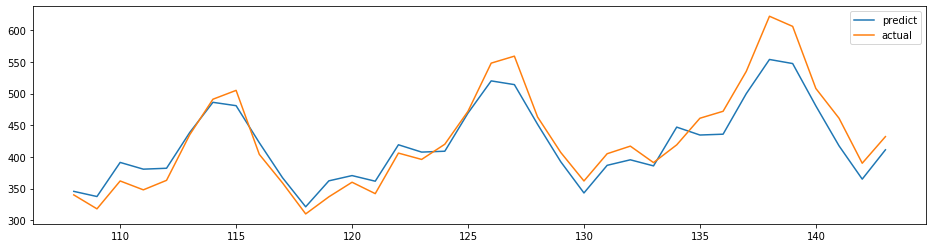

In [20]:
plot_ys(predict,y_test,labels=['predict','actual'])
plt.plot()

In [21]:
np.sum(se(predict.to_numpy(),y_test.to_numpy()))

25596.571581661166

# NNLS Fit

In [22]:
hedge_expert = NNLSEnsemble(3,loss_func=loss_func)

In [23]:
forecaster = OnlineEnsembleForecaster(hedge_expert,[
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])

In [24]:
forecaster.fit(y_train)

/home/memo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


OnlineEnsembleForecaster(ensemble_algorithm=<sktime.forecasting.ensemble_algorithms.NNLSEnsemble object at 0x7f55c5c46190>,
                         forecasters=[('ses',
                                       ExponentialSmoothing(damped=False,
                                                            damping_slope=None,
                                                            optimized=True,
                                                            remove_bias=False,
                                                            seasonal='multiplicative',
                                                            smoothing_level=None,
                                                            smoothing_seasonal=None,
                                                            smoothing_slope=None,
                                                            sp=12, trend=None,
                                                            use_basinhoppin...
                           

In [25]:
forecaster._fit_ensemble(y_test)

array([0.        , 1.02424641, 0.        ])

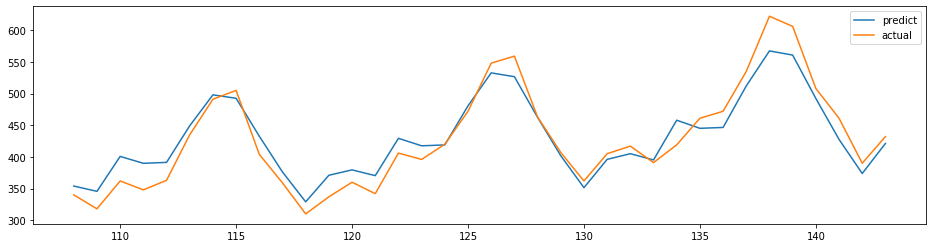

In [26]:
predict = forecaster.predict(fh)

plot_ys(predict,y_test,labels=['predict','actual'])
plt.plot()
forecaster.ensemble_algorithm.weights

In [27]:
np.sum(se(predict.to_numpy(),y_test.to_numpy()))

21728.089456874714